<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/mamatha/blob/main/assignment_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/Airlines+Data.xlsx',index_col='Month',parse_dates=True)
df.index.freq = 'MS'



In [ ]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:

df.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [ ]:
# lag plot

In [ ]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt


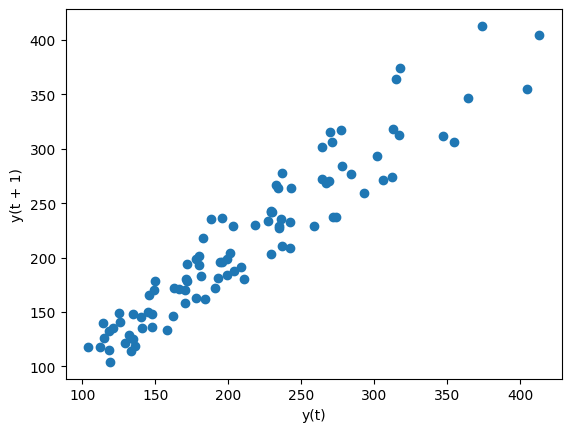

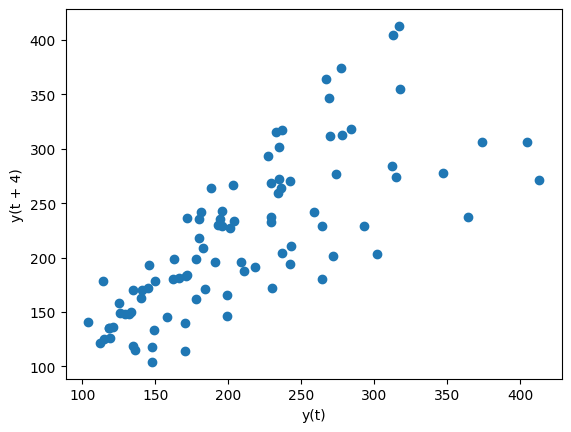

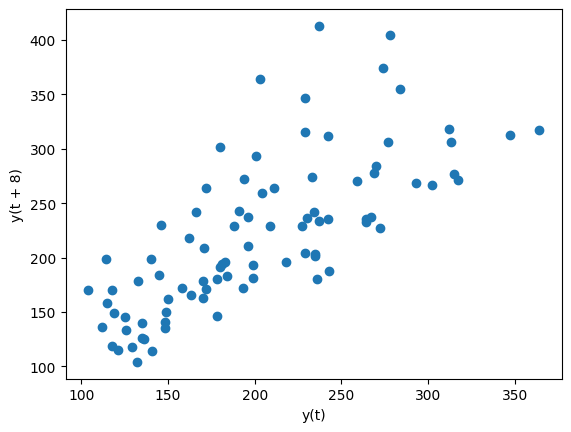

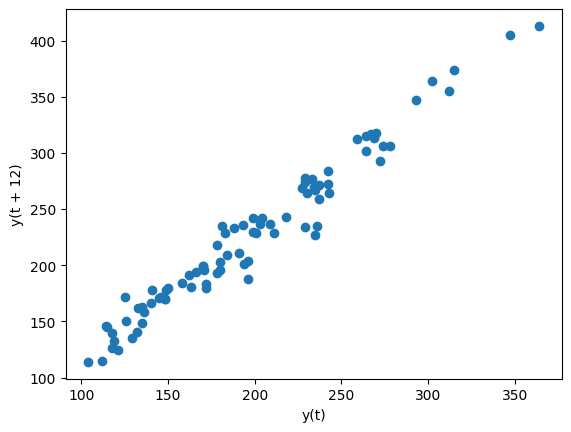

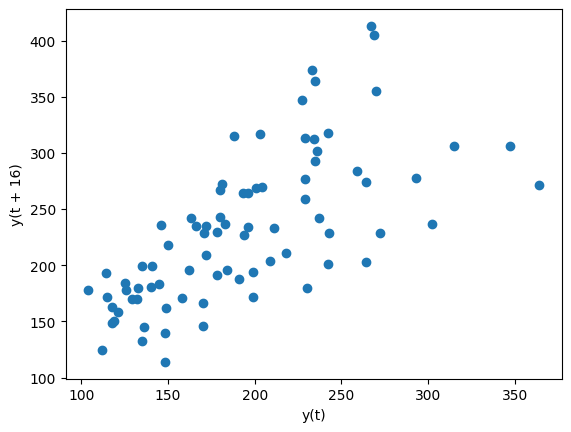

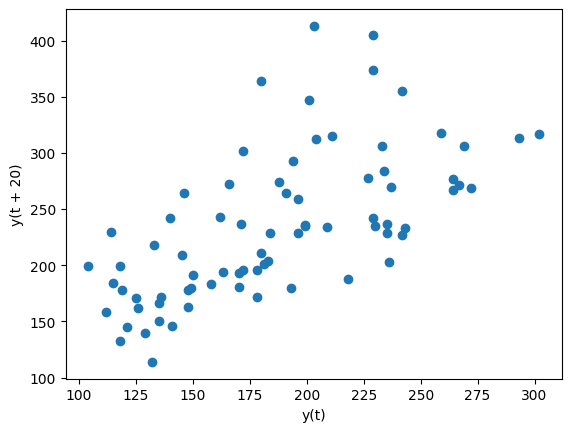

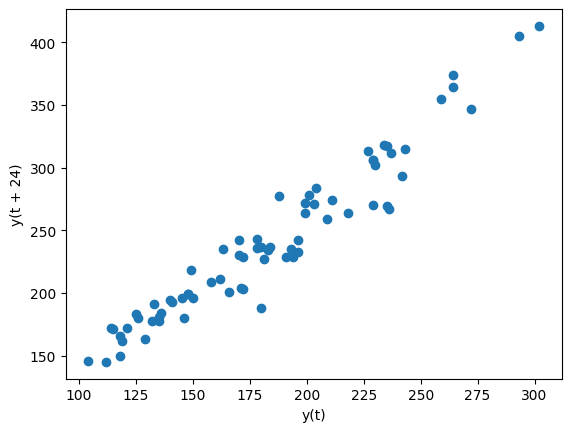

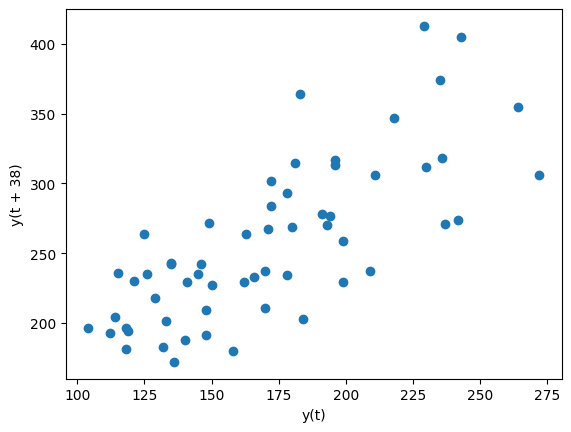

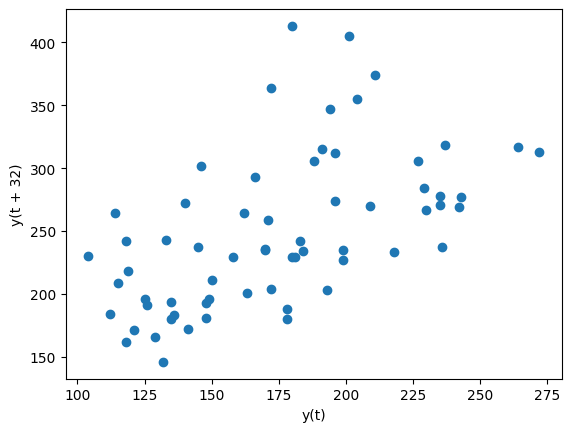

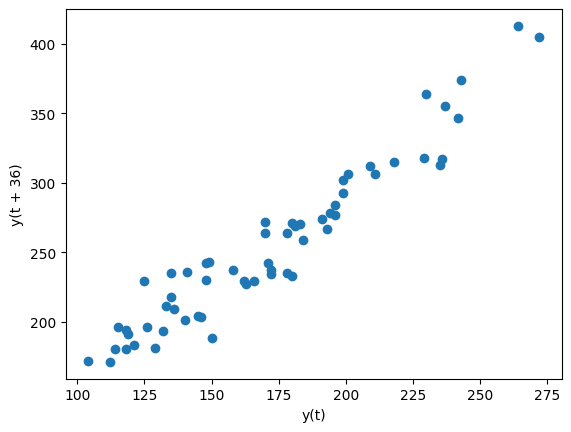

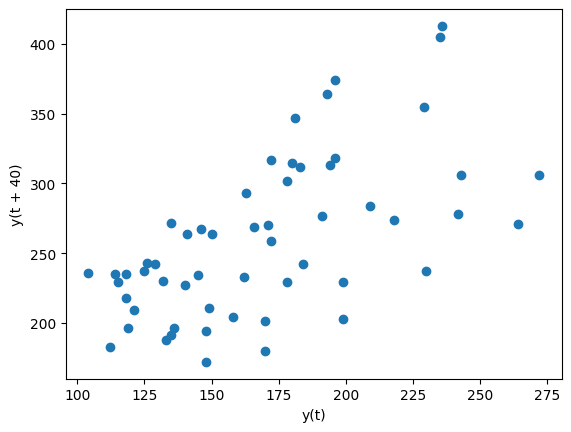

In [ ]:

for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(df.Passengers, lag=i)
    plt.show()

Moving Average

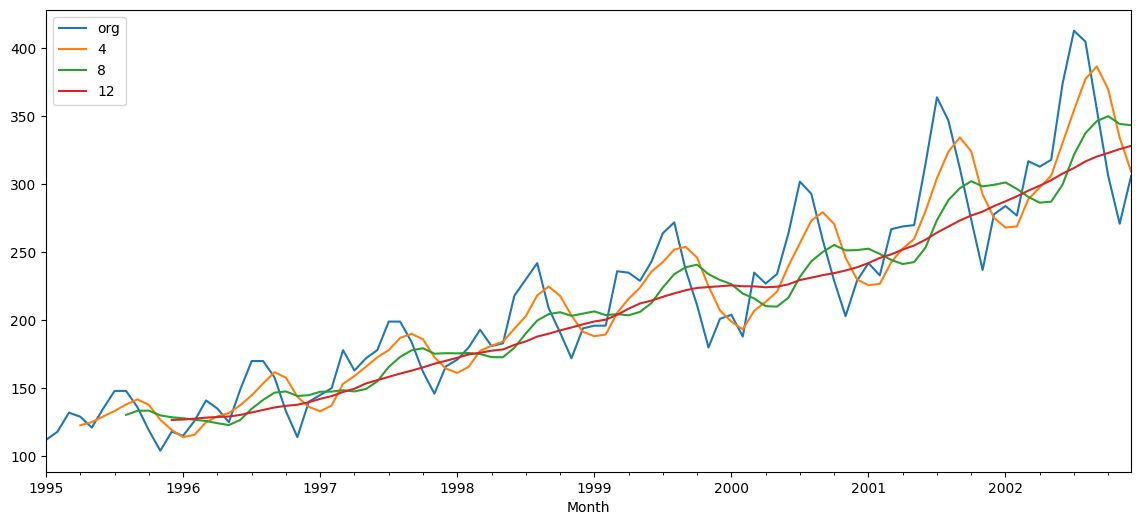

In [ ]:
plt.figure(figsize=(14,6))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

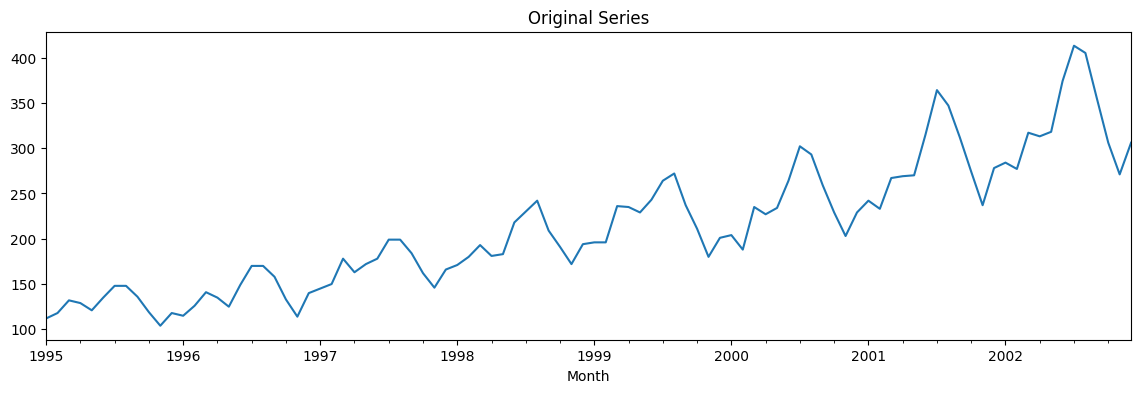

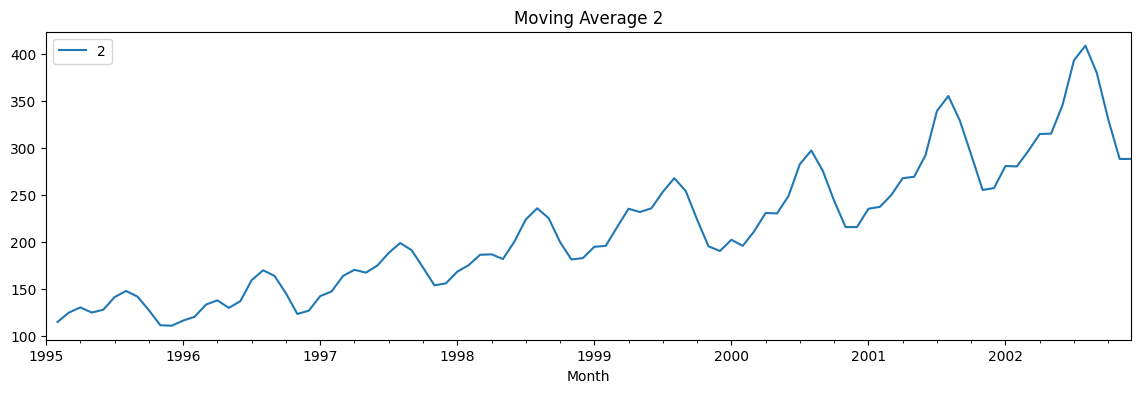

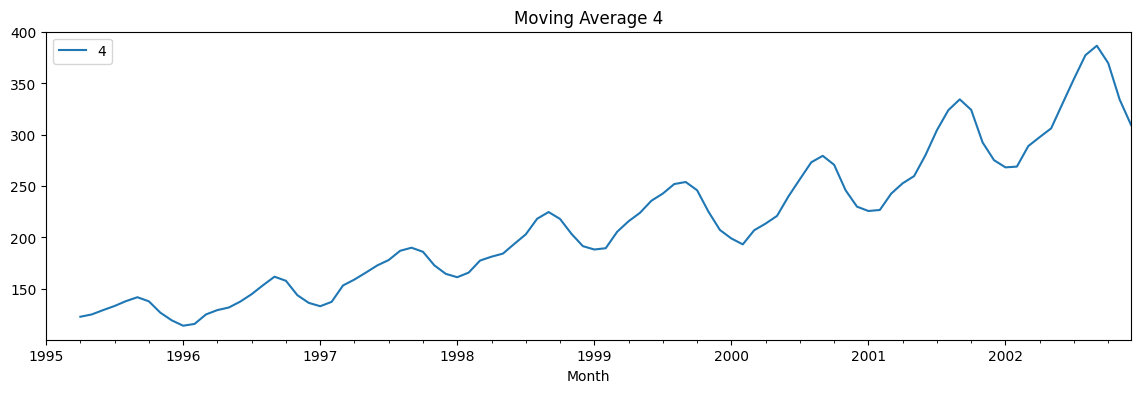

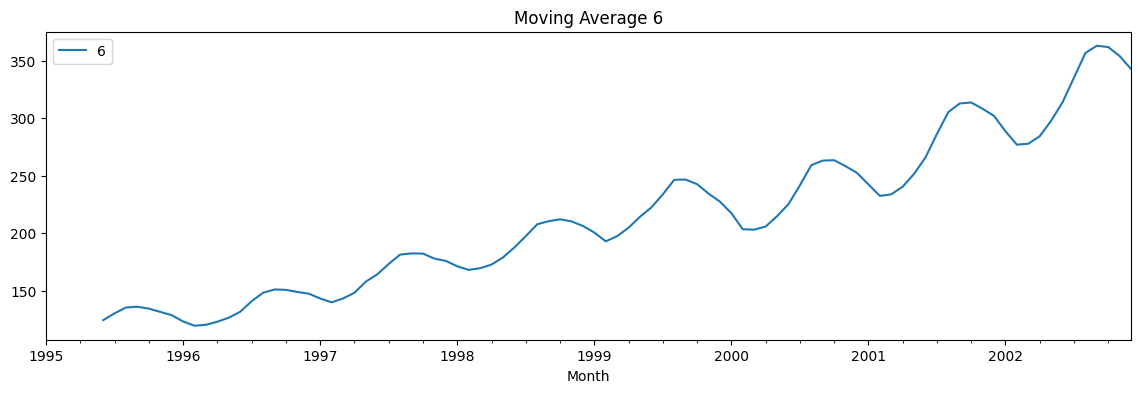

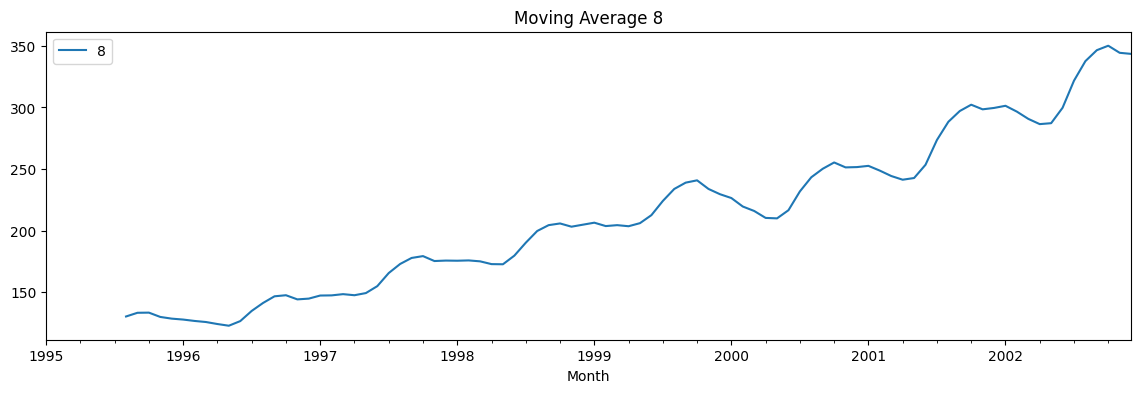

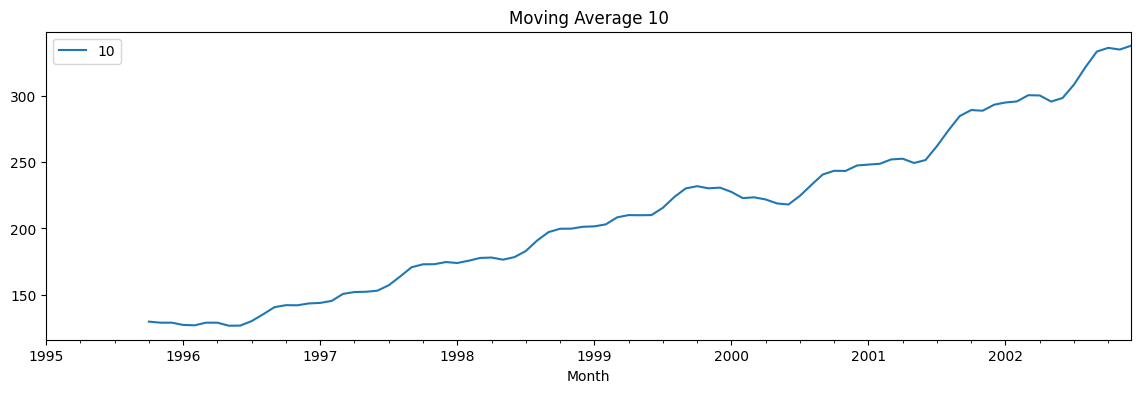

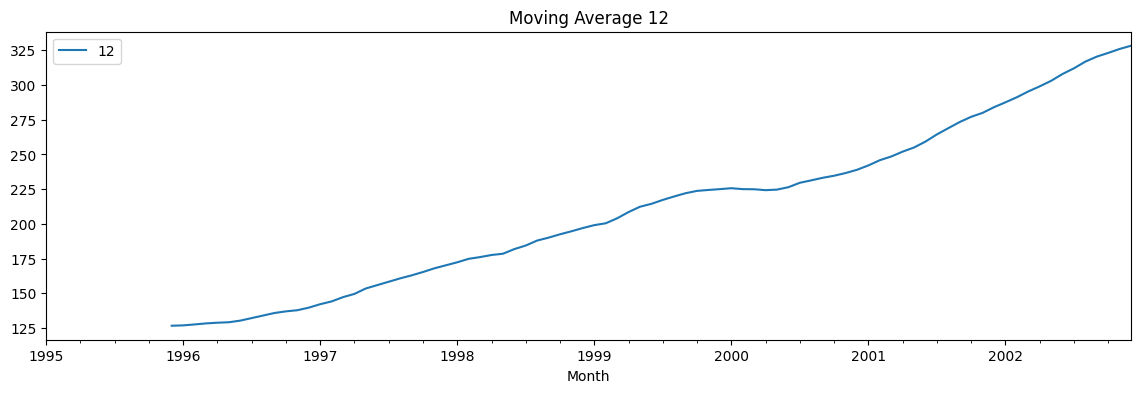

In [ ]:
plt.figure(figsize=(14,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

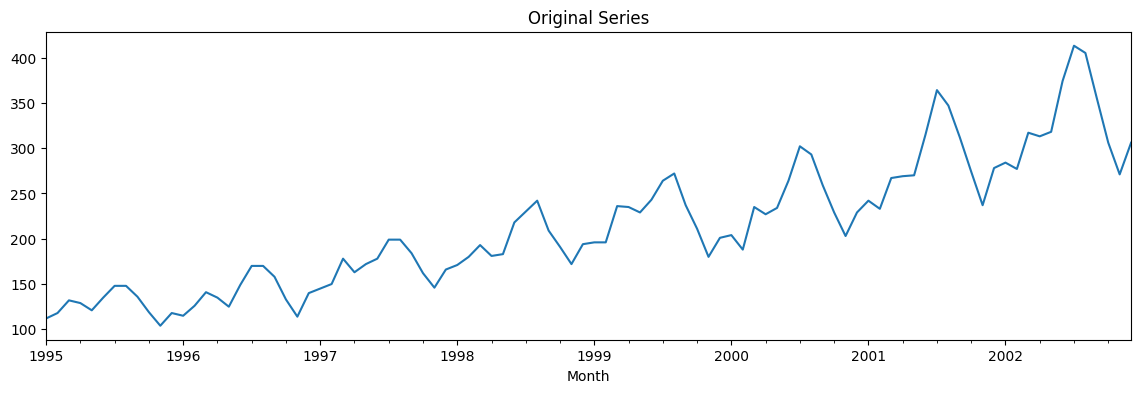

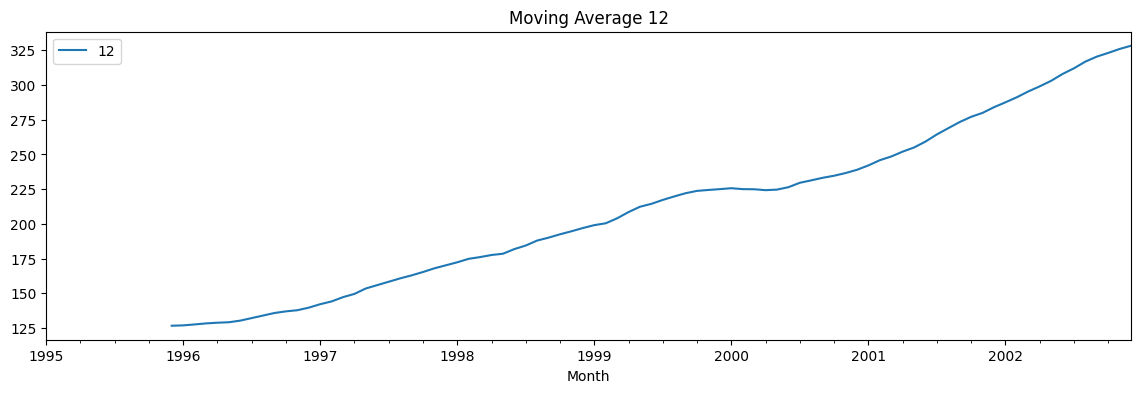

In [ ]:
plt.figure(figsize=(14,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
df["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

In [ ]:
#ACF plots and PACF plots
#Autocorrelation Function (ACF)

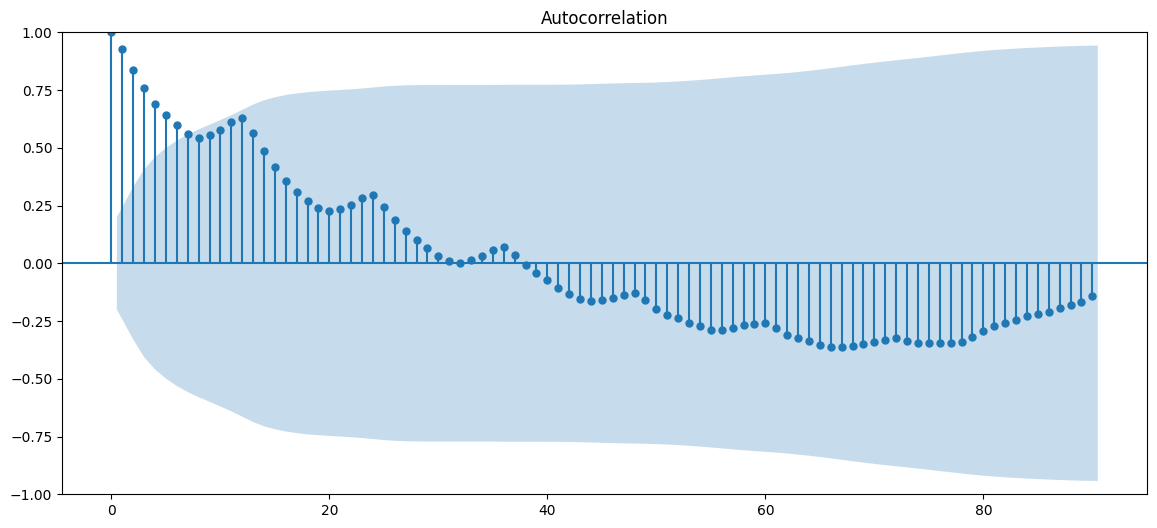

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.Passengers, lags=90)
    plt.show()

In [ ]:
#Partial Autocorrelation Function (PACF)


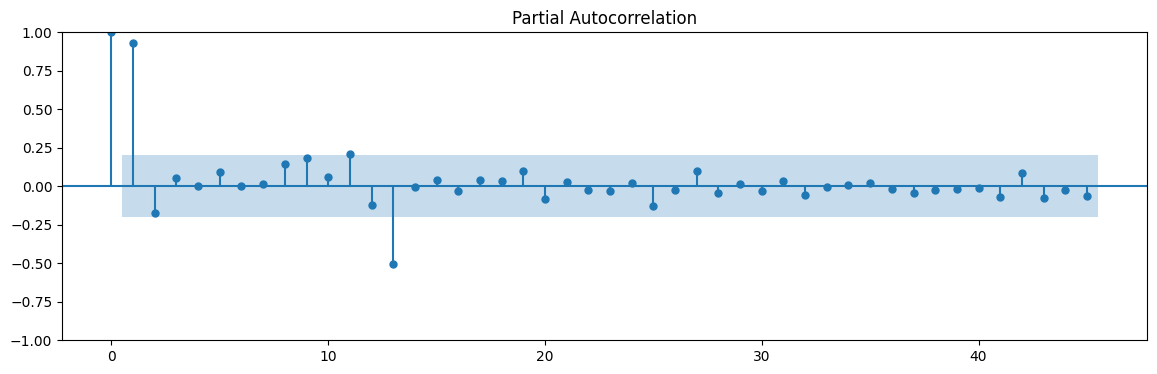

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(df.Passengers,lags=45)
    plt.show()

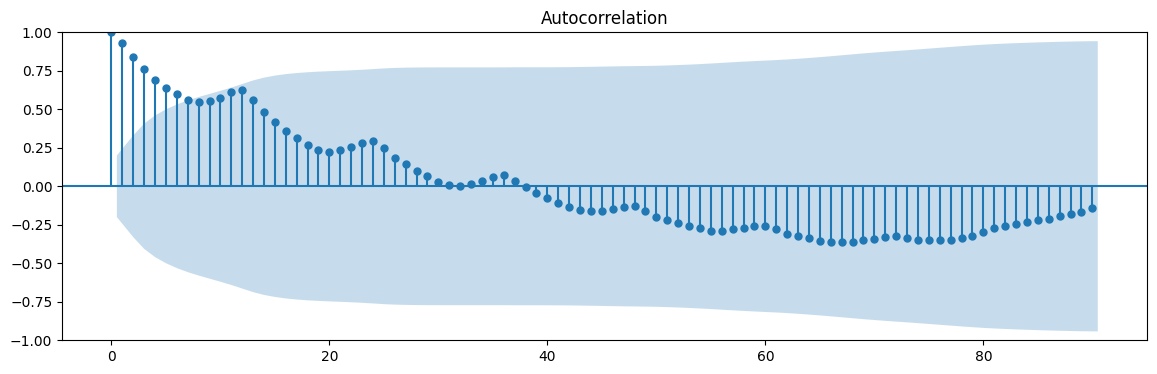

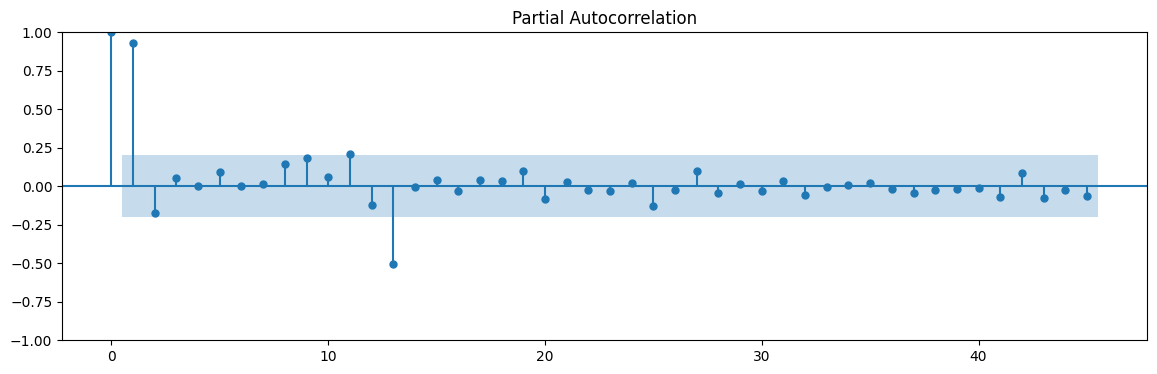

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_acf(df.Passengers,lags=90)
    tsa_plots.plot_pacf(df.Passengers,lags=45)
    plt.show()

In [ ]:
#SPLIT TRAINING AND TESTING DATA

In [ ]:
train_data = df.iloc[:72]
test_data = df.iloc[72:]

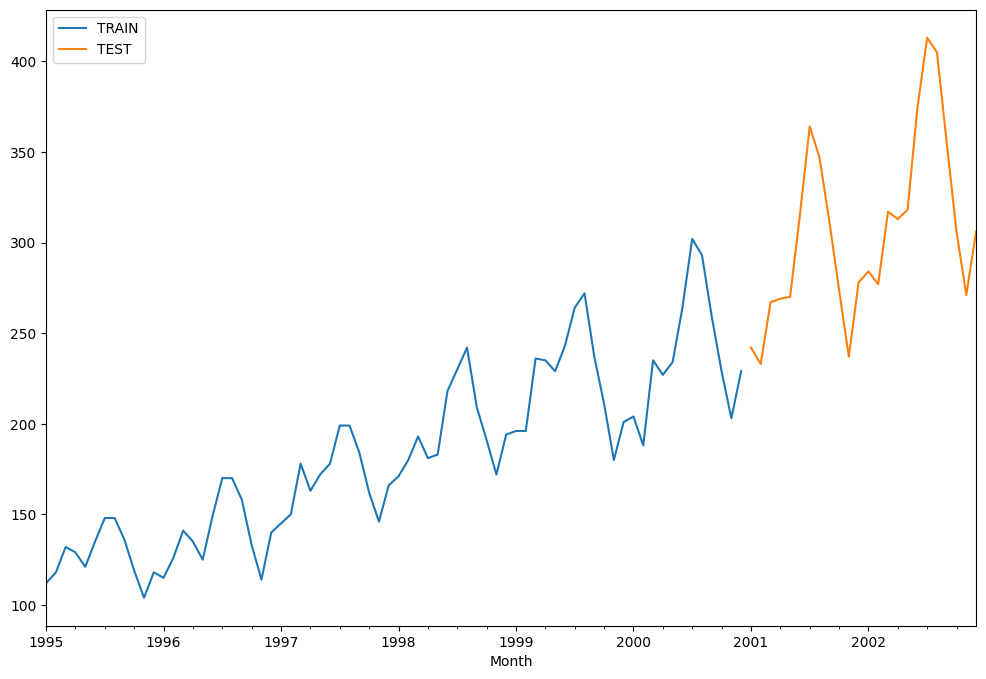

In [ ]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

In [ ]:
# fitting the model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model = model.fit()

In [ ]:
#evaluating model against test set

In [ ]:
test_predictions = fitted_model.forecast(24)

In [ ]:
test_predictions

2001-01-01    233.064574
2001-02-01    234.636501
2001-03-01    274.649481
2001-04-01    264.204558
2001-05-01    263.842236
2001-06-01    293.360611
2001-07-01    324.746337
2001-08-01    327.241121
2001-09-01    290.983976
2001-10-01    257.687013
2001-11-01    226.696719
2001-12-01    257.565566
2002-01-01    261.603585
2002-02-01    263.367996
2002-03-01    308.280608
2002-04-01    296.556693
2002-05-01    296.150004
2002-06-01    329.282937
2002-07-01    364.511879
2002-08-01    367.312153
2002-09-01    326.615281
2002-10-01    289.241068
2002-11-01    254.455979
2002-12-01    289.104750
Freq: MS, dtype: float64

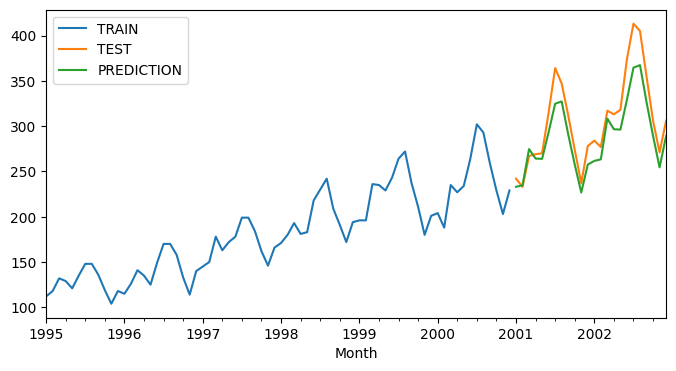

In [ ]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(8,4))
test_predictions.plot(legend=True,label='PREDICTION');

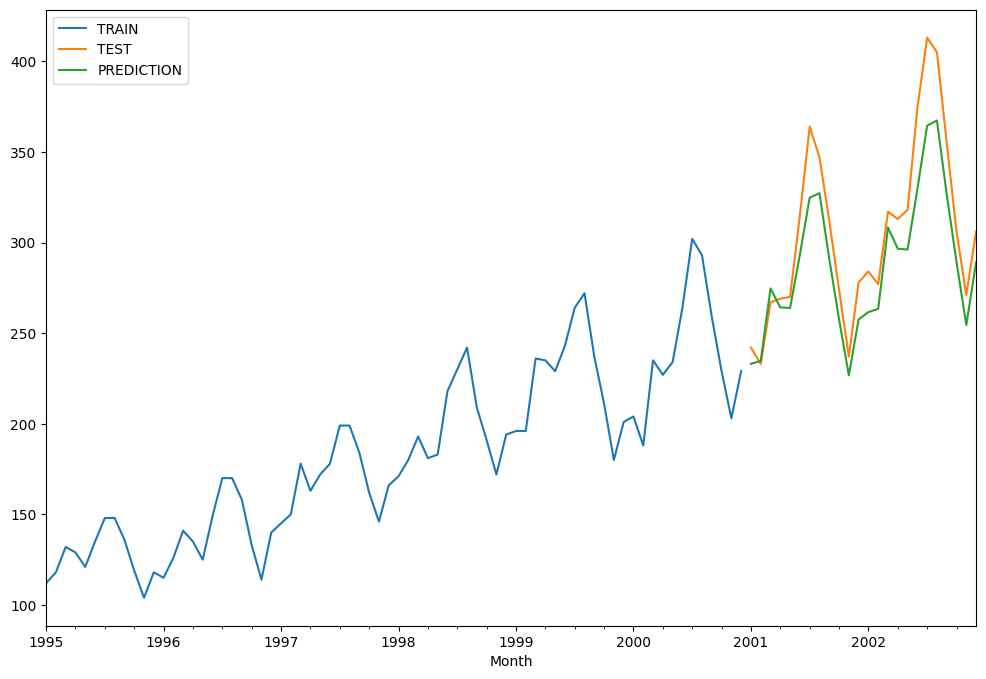

In [ ]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1995-01-01','2002-12-01']);

In [ ]:
# evaluation metrics

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_data,test_predictions)

531.7102010624327

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

23.058842144878668

In [ ]:
test_data.describe()

,Passengers
count,24.000000
mean,306.125000
std,49.554812
min,233.000000
25%,270.750000
50%,306.000000
75%,325.250000
max,413.000000


In [ ]:
# forecasting into future

In [ ]:
final_model = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

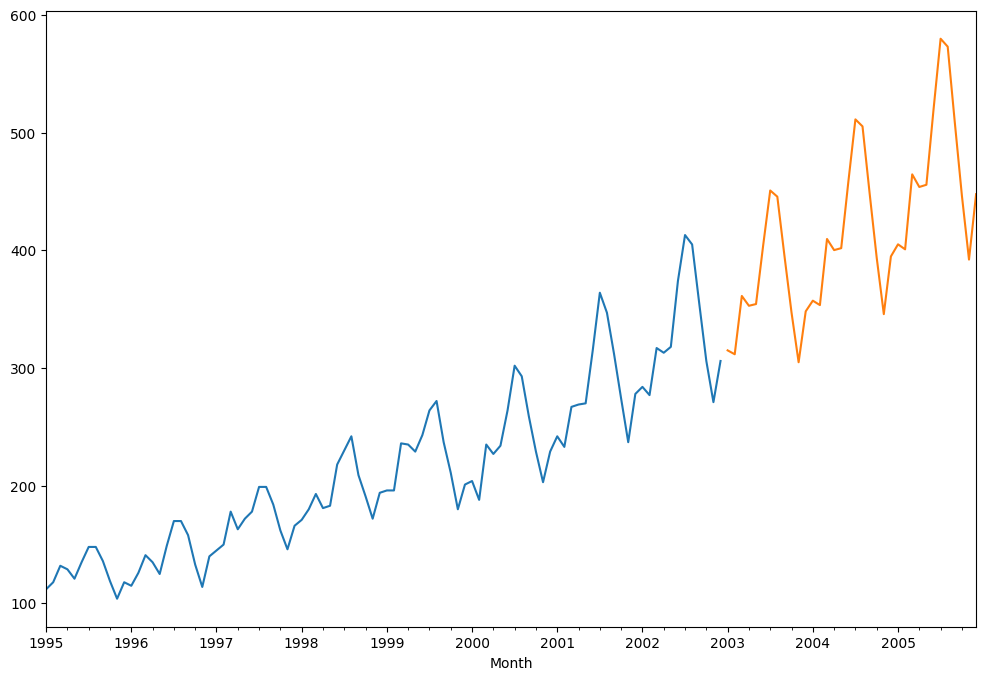

In [ ]:
df['Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

In [ ]:
# in this model understands trend but not seasonality

In [ ]:
# Holts-Winters method

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/Airlines+Data.xlsx',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
df.fillna(method='ffill')

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [ ]:
df.index.freq

In [ ]:
#Setting a DatetimeIndex Frequency

In [ ]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [ ]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<Axes: xlabel='Month'>

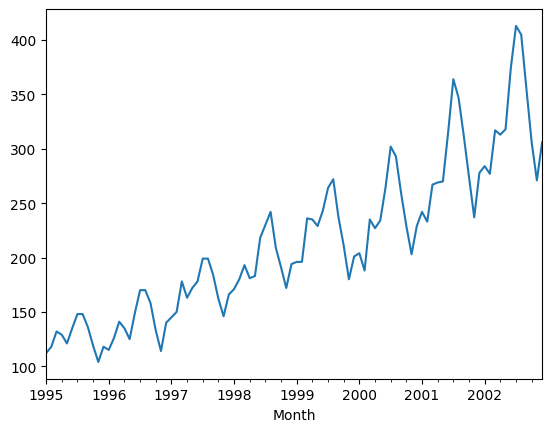

In [ ]:
df['Passengers'].plot()


In [ ]:
#Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

In [ ]:
model_ses12=SimpleExpSmoothing(df['Passengers'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

Month
1995-01-01    112.000000
1995-02-01    112.000000
1995-03-01    112.900000
1995-04-01    115.765000
1995-05-01    117.750250
                 ...    
2002-08-01    321.862581
2002-09-01    334.333194
2002-10-01    337.433215
2002-11-01    332.718232
2002-12-01    323.460498
Freq: MS, Length: 96, dtype: float64

In [ ]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12
Month,,
1995-01-01,112,112.000000
1995-02-01,118,112.900000
1995-03-01,132,115.765000
1995-04-01,129,117.750250
1995-05-01,121,118.237712


In [ ]:
#Double Exponential Smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(df['Passengers'], trend='add')
fitted_model= mod_add12.fit()
df['DESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12
Month,,,
1995-01-01,112,112.000000,114.102394
1995-02-01,118,112.900000,120.040657
1995-03-01,132,115.765000,134.001539
1995-04-01,129,117.750250,131.085845
1995-05-01,121,118.237712,123.110263


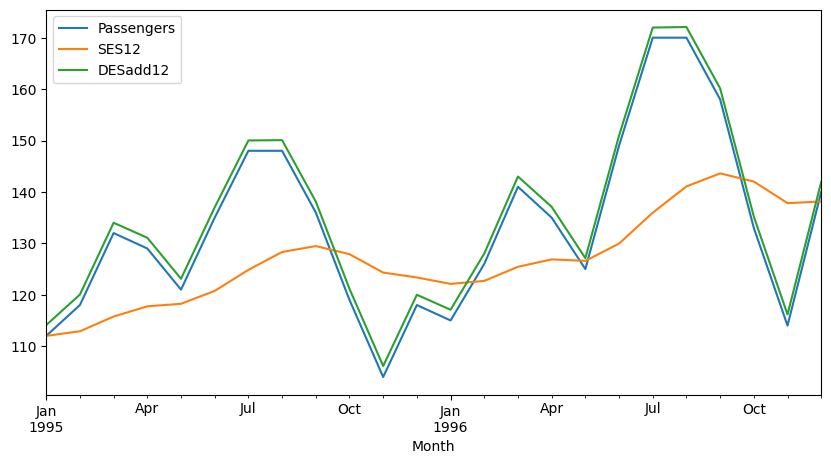

In [ ]:
df[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(10,5));

In [ ]:
df['DESmul12'] = ExponentialSmoothing(df['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12
Month,,,,
1995-01-01,112,112.000000,114.102394,111.934876
1995-02-01,118,112.900000,120.040657,117.866471
1995-03-01,132,115.765000,134.001539,131.865604
1995-04-01,129,117.750250,131.085845,128.984036
1995-05-01,121,118.237712,123.110263,120.991853


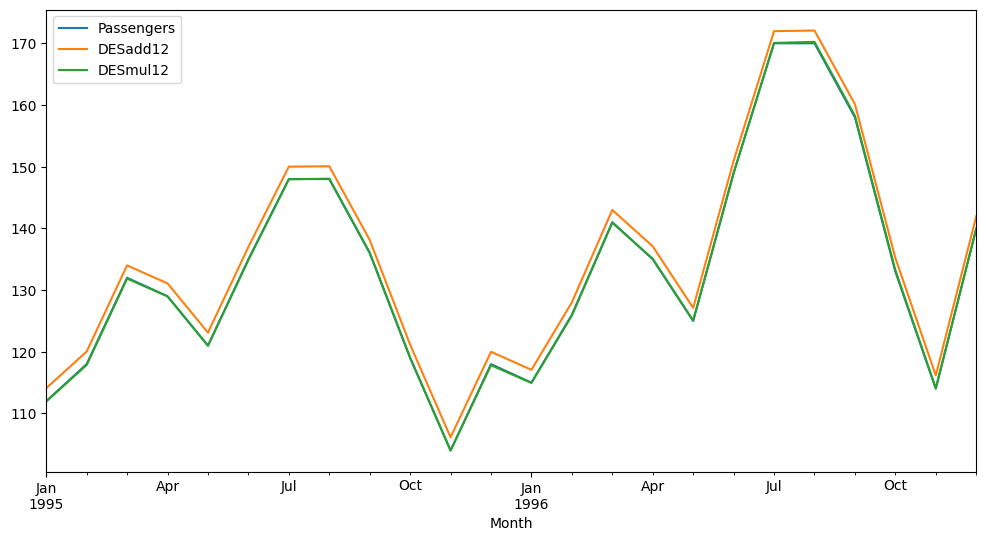

In [ ]:
df[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6));

In [ ]:
#Triple Exponential Smoothing

In [ ]:
df['TESadd12'] = ExponentialSmoothing(df['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,
1995-01-01,112,112.000000,114.102394,111.934876,111.999876
1995-02-01,118,112.900000,120.040657,117.866471,119.930734
1995-03-01,132,115.765000,134.001539,131.865604,134.244930
1995-04-01,129,117.750250,131.085845,128.984036,130.733314
1995-05-01,121,118.237712,123.110263,120.991853,123.859801


In [ ]:
df['TESmul12'] = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,
1995-01-01,112,112.000000,114.102394,111.934876,111.999876,113.645448
1995-02-01,118,112.900000,120.040657,117.866471,119.930734,111.327250
1995-03-01,132,115.765000,134.001539,131.865604,134.244930,134.355902
1995-04-01,129,117.750250,131.085845,128.984036,130.733314,129.668663
1995-05-01,121,118.237712,123.110263,120.991853,123.859801,129.739554


<Axes: xlabel='Month'>

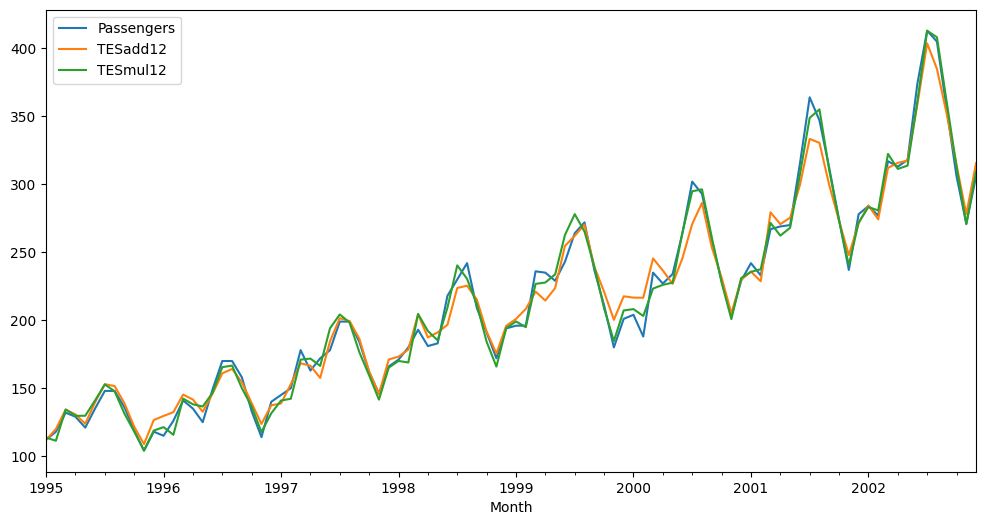

In [ ]:
df[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6))

<Axes: xlabel='Month'>

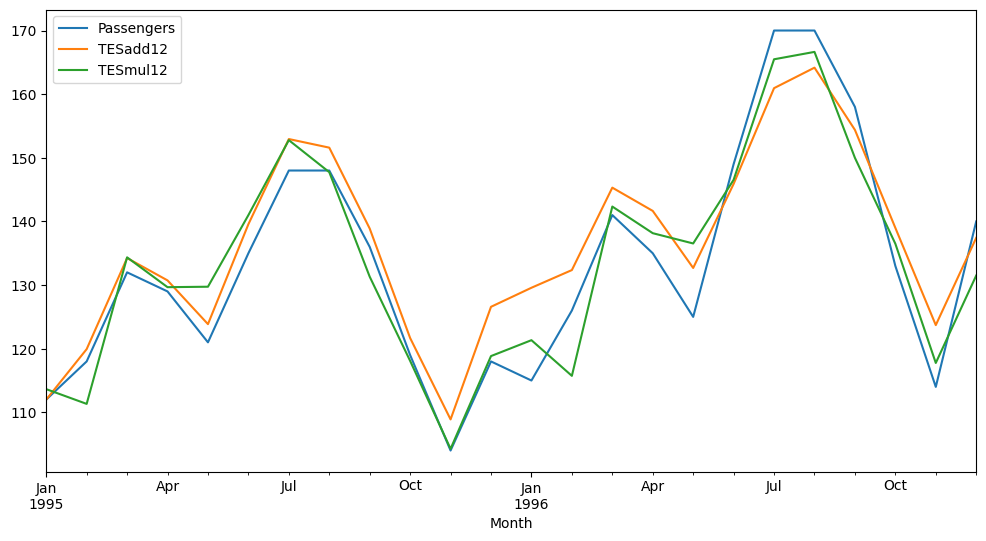

In [ ]:
df[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6))

In [ ]:
#Autoregressive Integrated Moving Averages (ARIMA)


In [ ]:
df1 = pd.read_excel('Airlines+Data.xlsx')
df1

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
df1.rename({'Month':'Date'}, axis=1, inplace=True)

In [ ]:
df1

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
airline = df1.copy()
airline.set_index('Date', inplace=True)
airline.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [ ]:
import matplotlib.pyplot as plt

from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
def test_stationarity(timeseries):

    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


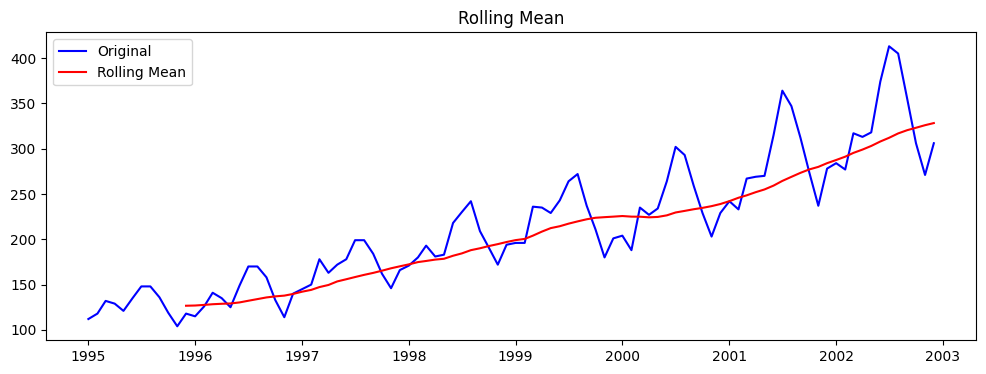

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Passengers'] = df[['Passengers']]
test_stationarity(sales)

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
#Feature Scaling (Transformations)
#1. Square Root Transform

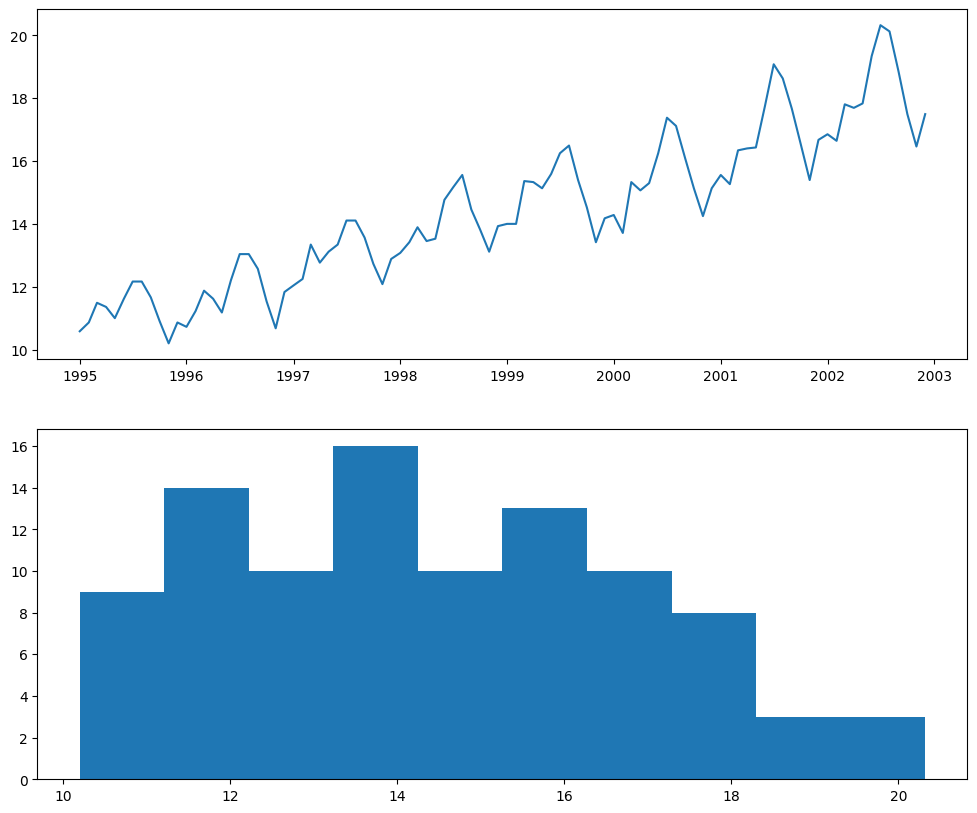

In [ ]:
square_root= pd.DataFrame()
square_root = df[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

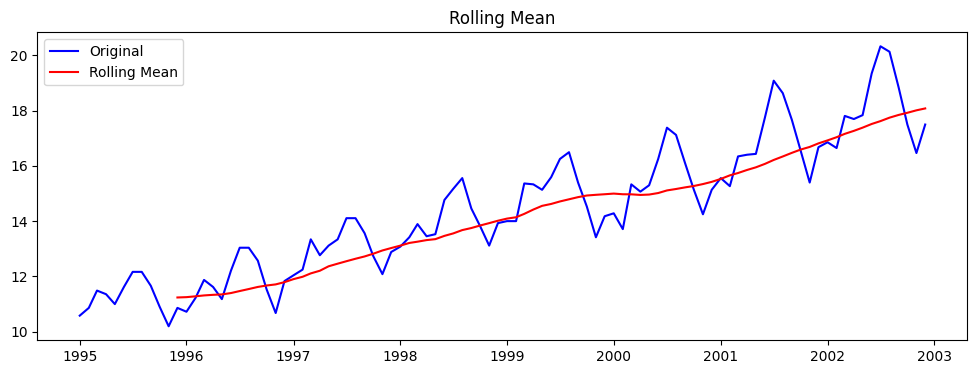

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

In [ ]:
adf_test(square_root)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
#2. log transform

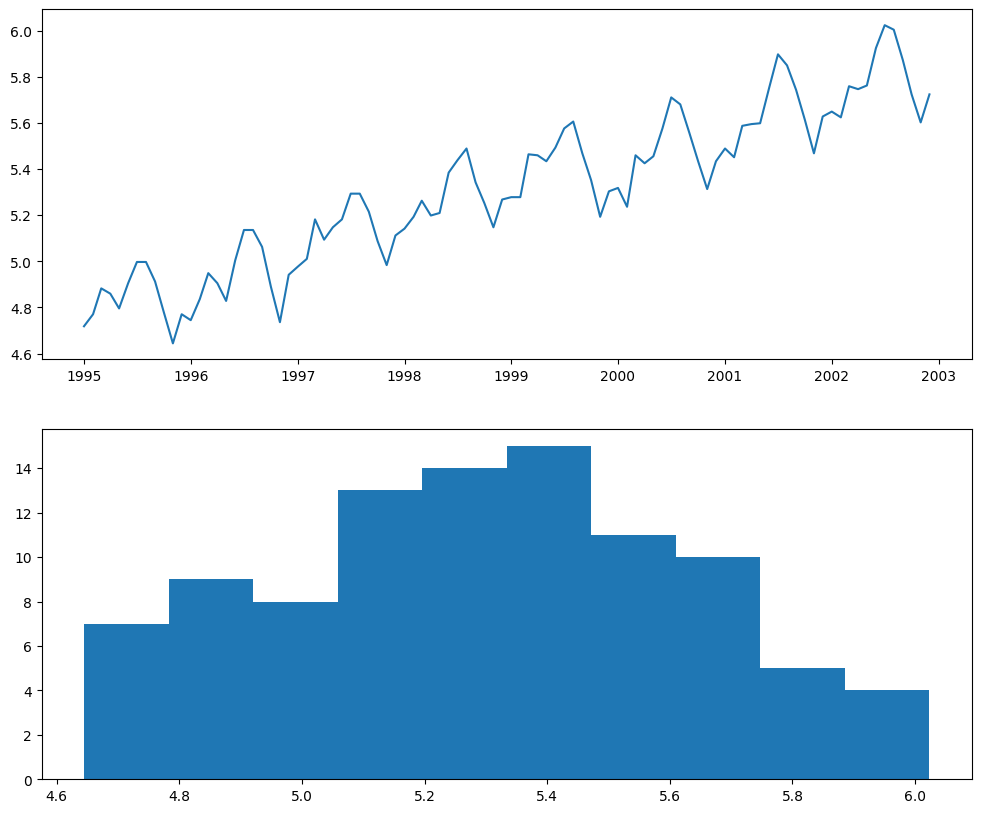

In [ ]:
log = pd.DataFrame()
log = df[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

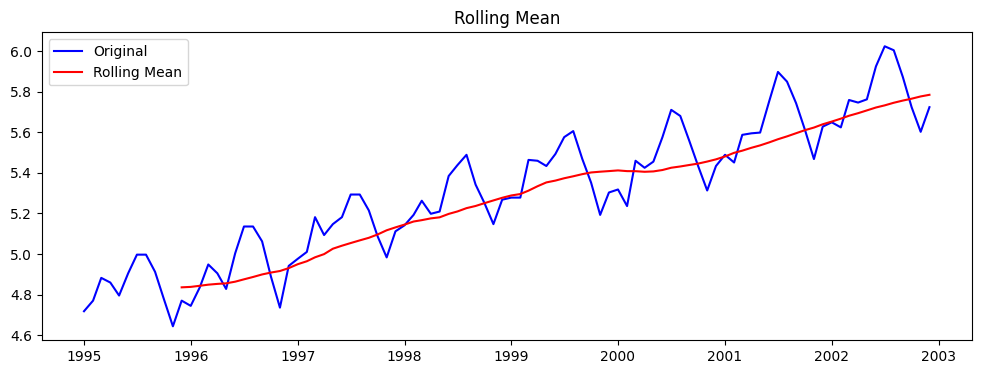

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [ ]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
#Hence, the Time series data is Non-Stationary


In [ ]:

#3. Converting Non-Stationary Time Series into Stationary
#       Differencing

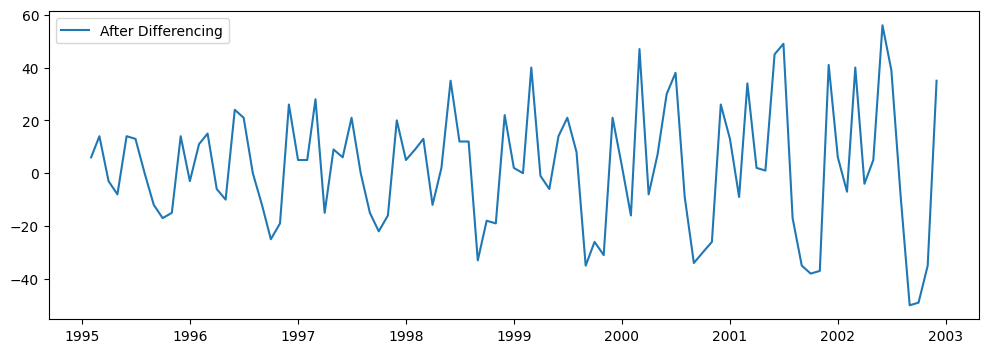

In [ ]:
differencing = airline - airline.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

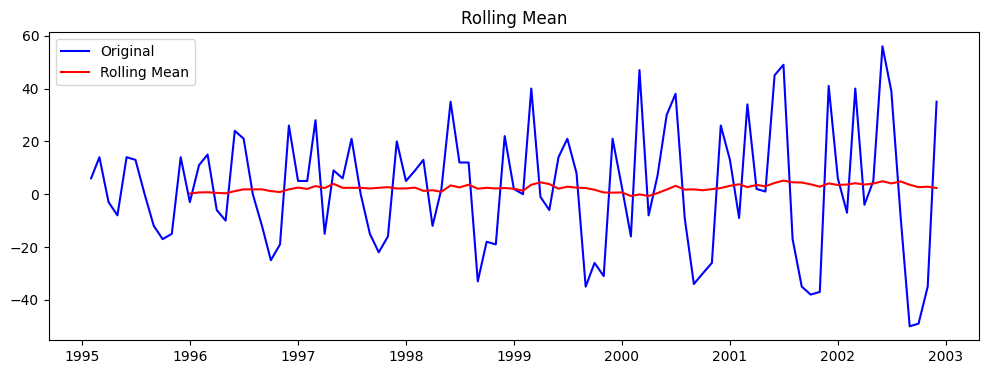

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(differencing)

In [ ]:
adf_test(differencing)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# seasonal differening

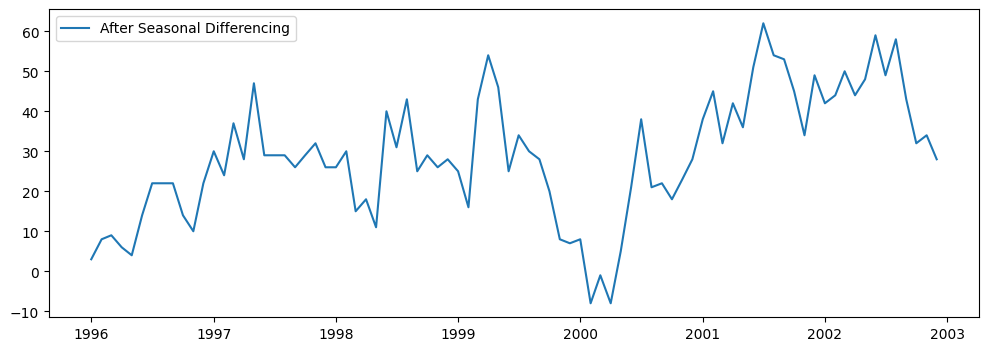

In [ ]:
seasonal_differencing = airline - airline.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

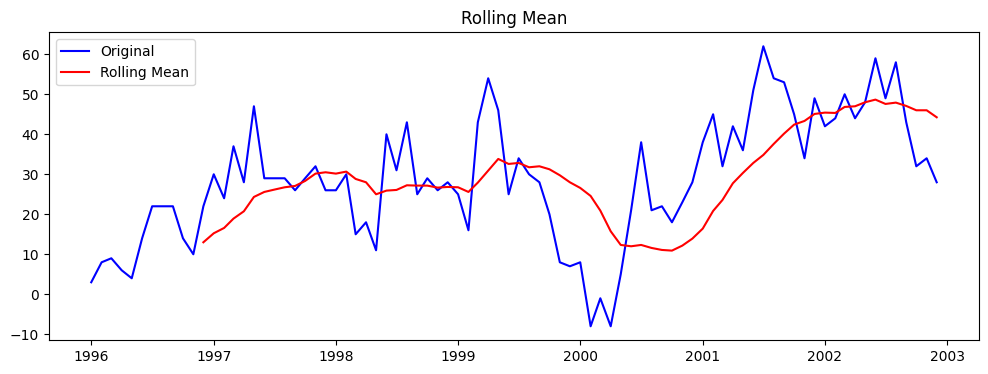

Results of Dickey Fuller Test:
Test Statistic                 -2.690004
p-value                         0.075784
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(seasonal_differencing)

In [ ]:
adf_test(seasonal_differencing)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# transforming

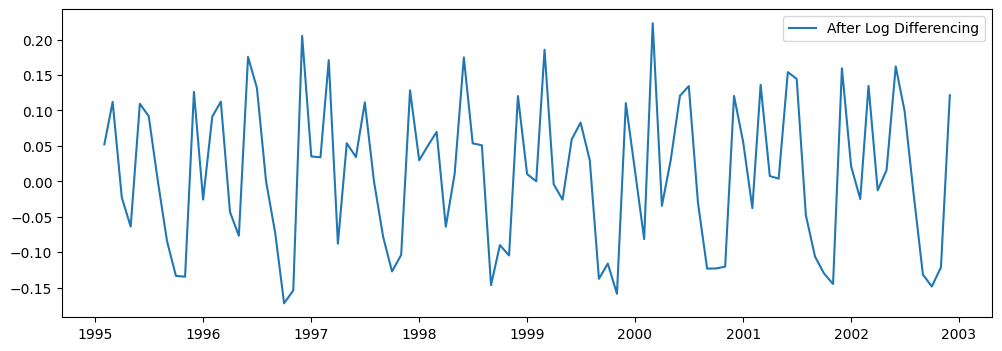

In [ ]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

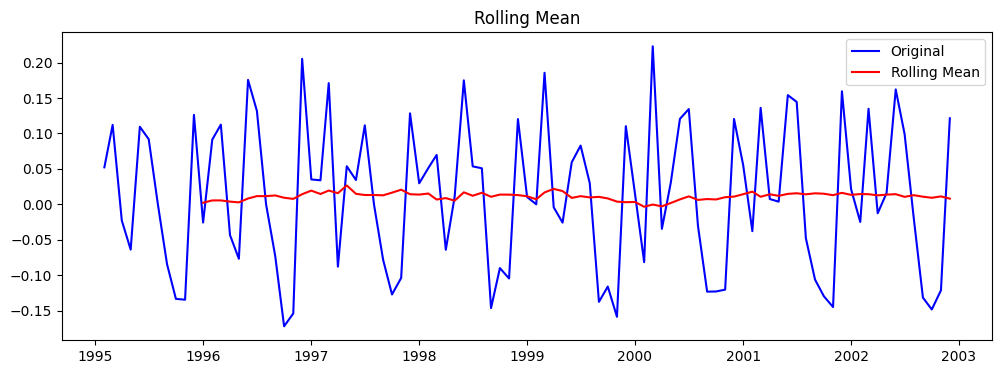

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(log_diff)

In [ ]:
adf_test(log_diff)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# box-cox transform

,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


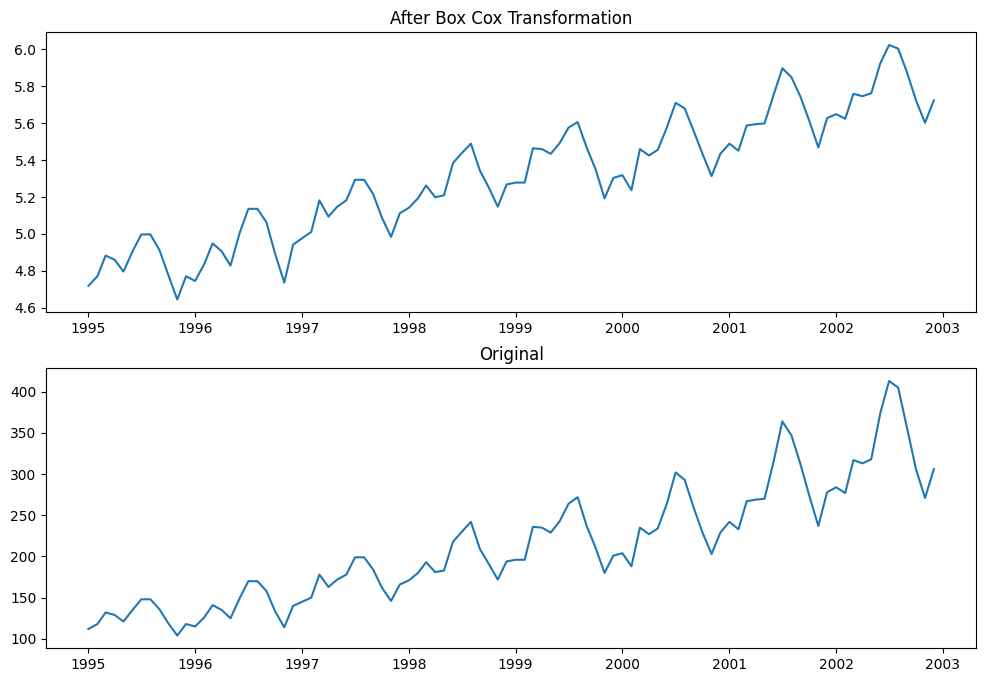

In [ ]:
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(airline['Passengers'], lmbda=0), airline.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(airline, label='original')
axis[1].set_title('Original')
plt.show()

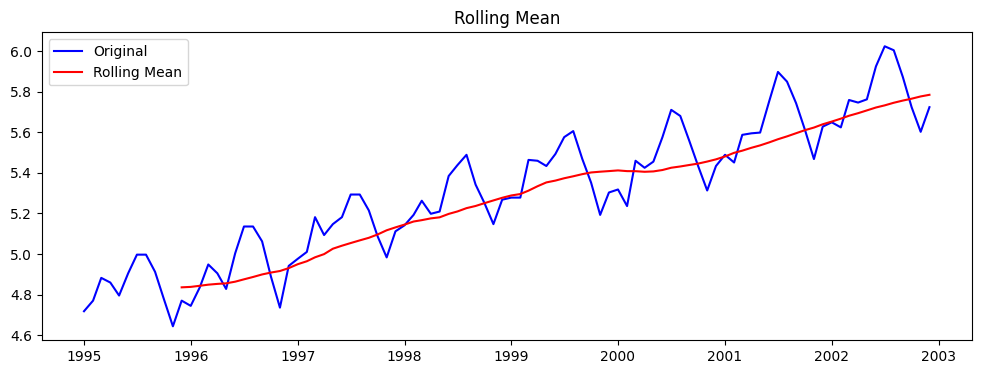

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)


In [ ]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


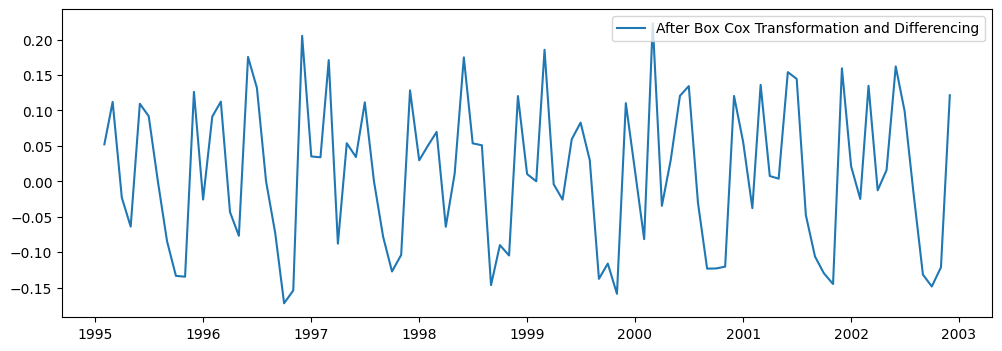

In [ ]:
#Differencing of the Box-Cox Transformation
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

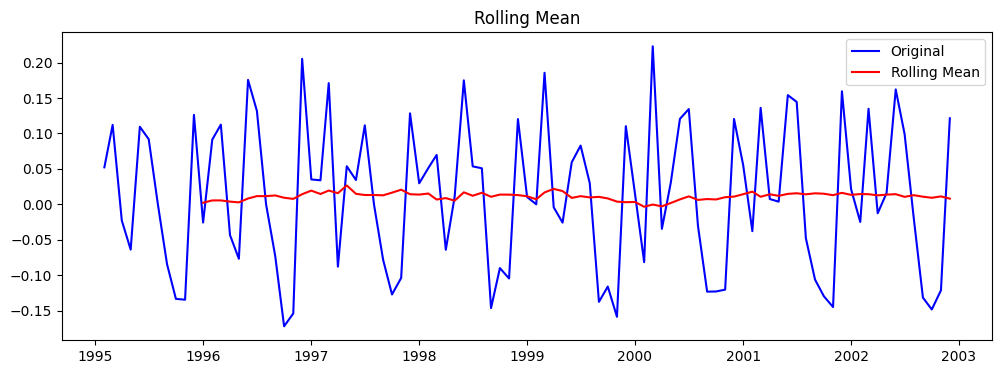

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [ ]:
adf_test(data_boxcox_diff)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
#Building The Time Series Forecasting with Optimal Value using ARIMA


In [ ]:
size = 72
train_data = airline[:size]
test_data = airline[size:]

In [ ]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


In [ ]:
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]

In [ ]:
#ARIMA Hyperparameter Tuning

In [ ]:
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Passengers, p_values, d_values, q_values)

Best ARIMA(4, 1, 4) RMSE=0.090


In [ ]:
#Inverse transformation of the Box-Cox Differencing

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])

# Now doing the reverse transformation
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

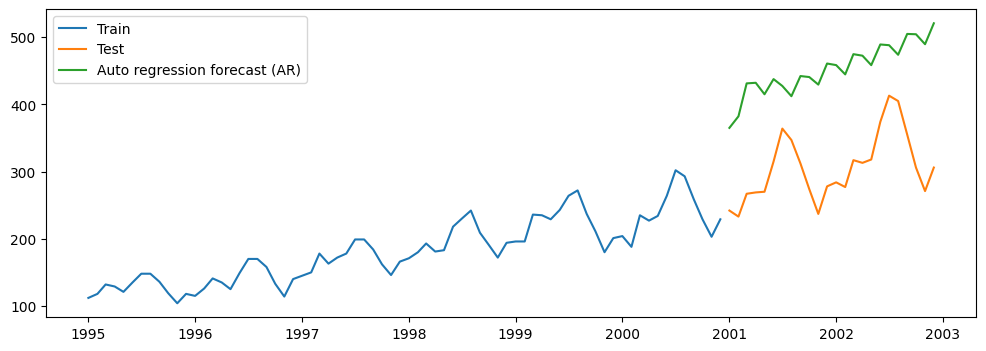

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE
rmse_arima = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

152.57

In [ ]:
#MAPE
mape_arima = round(np.mean(np.abs((test_data.Passengers - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_arima

50.27

In [ ]:
#The mean of the Residual should be zero or close to Zero

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

-0.005710683617502512

Residuals must be stationary

In [ ]:
adf_test(model_residual)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# NO AUTOCORRELATION B/W RESIDUALS

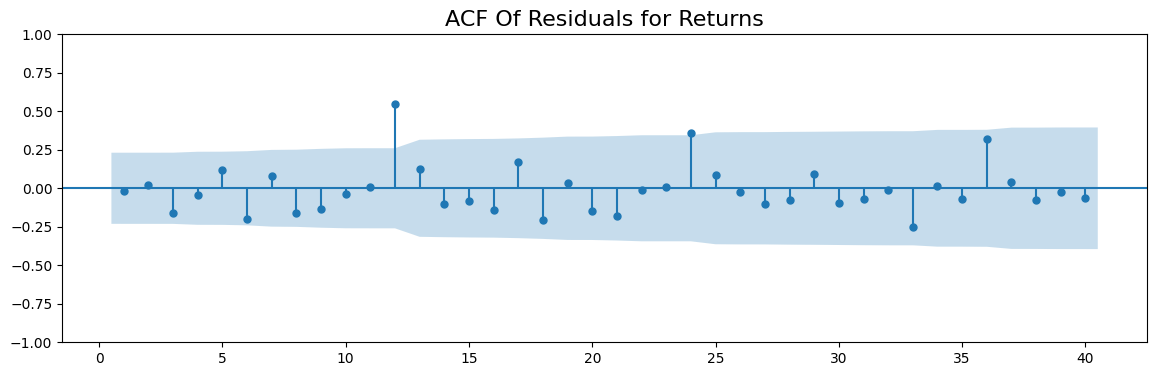

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()
adf_test(model_residual)

In [ ]:
# RESIDUAL MUST BE RANDOM

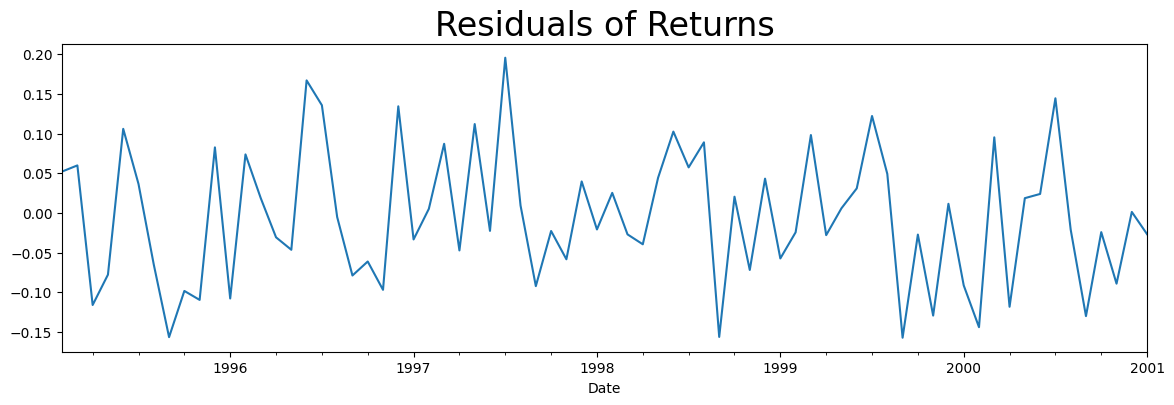

In [ ]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()

Seasonal Auto Regressive Integrated Moving Average (SARIMA)
We are only passing the Box Cox because the ARIMAX will perform the differencing internally
seasonal_order P=1, Q=1, D=1 and m=12 || m=12 . Because the seasonality is monthly.

In [ ]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

Inverse Transformation of the Differencing Box-Cox Transformation

In [ ]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

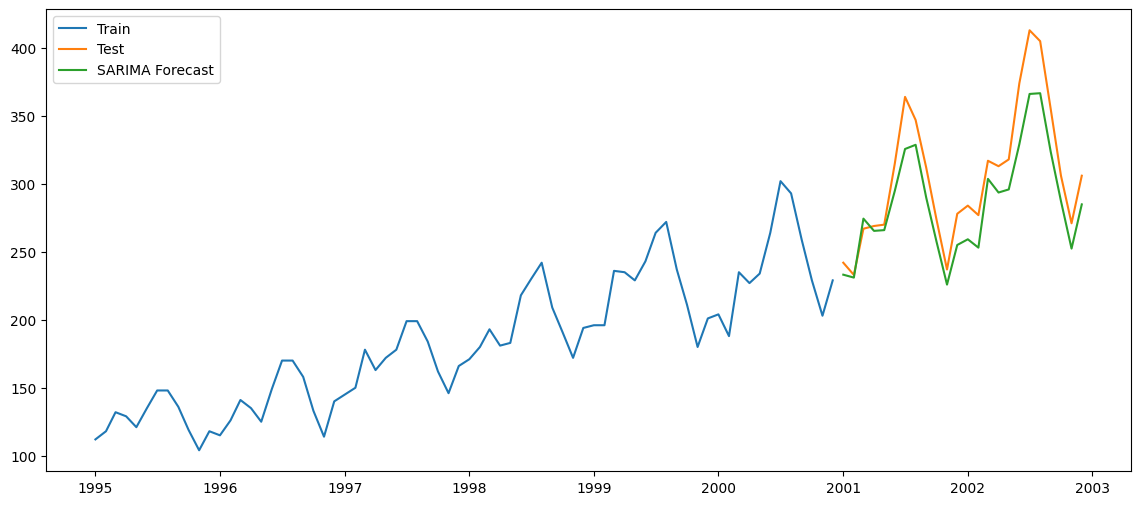

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

Model Evaluation

RMSE (Root Mean Squared Error)

In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_sarima

23.98

MAPE

In [ ]:
mape_sarima = round(np.mean(np.abs((test_data.Passengers - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_sarima


6.43

Analysing the Residuals

The mean of the Residual should be zero or close to Zero[link text](https://)

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

0.035874155035889616

Residuals must be stationary

In [ ]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


No autocorrelation between residuals


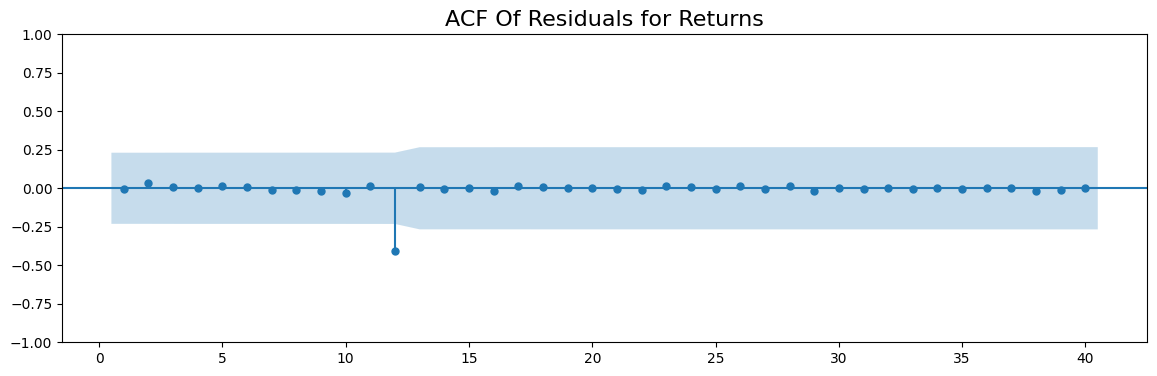

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size= 16)
plt.show()

Residuals must be random

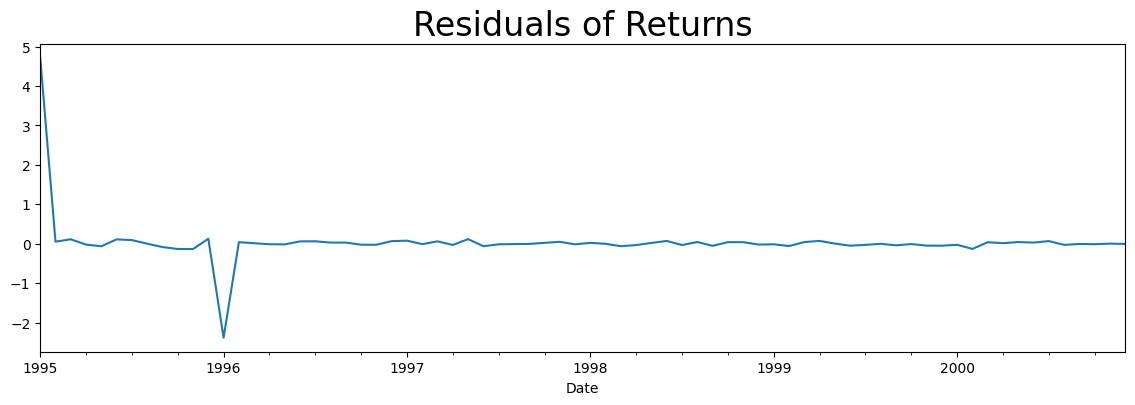

In [ ]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()